In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
#tf.config.experimental.list_physical_devices()

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

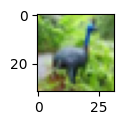

In [9]:
plot_sample(6)

In [10]:
y_train[4]

array([1], dtype=uint8)

In [11]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog","horse","ship","truck"]

In [12]:
classes[y_train[1][0]]

'truck'

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [14]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [15]:
X_test_scaled.shape

(10000, 32, 32, 3)

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
#using one hot encoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32' #num of classes is ten as we have 10 categories in the dataset
)

In [18]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
#output layer has 10 neurons as it has 10 classes or categories
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),#Flattening the array
    keras.layers.Dense(3000,activation='relu'),#hidden layer 1
    keras.layers.Dense(1000,activation='relu'),#hidden layer 2
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'SGD',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 141s 90ms/step - loss: 1.8102 - accuracy: 0.3558
Epoch 2/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.6220 - accuracy: 0.4257
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5392 - accuracy: 0.4585
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4809 - accuracy: 0.4767
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4301 - accuracy: 0.4948
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3887 - accuracy: 0.5128
Epoch 7/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.3475 - accuracy: 0.5255
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3140 - accuracy: 0.5395
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2823 - accuracy: 0.5504
Epoch 10/10
1563/1563 [==============================] - 63s 40

### Whenever you have one hot encoding, use categorical_crossentropy 
### If you have discrete values of y then use sparse_categorical_crossentropy 

In [20]:
classes[y_train[1][0]]

'truck'

In [21]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 4s 11ms/step


'truck'